# Python資料視覺化呈現，實作機器學習方法
http://www.cc.ntu.edu.tw/chinese/epaper/0041/20170620_4105.html

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import matplotlib
import numpy as np
import keras
import sklearn 

node1 = tf.constant(5.0, tf.float32)
node2 = tf.constant(3.5,tf.float32) 
sess = tf.Session()
print(sess.run([node1, node2]))

[5.0, 3.5]


NOTE: Console 端如果出現以下錯誤訊息
I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA

這只是 warning 建議你可以用 source code 編譯安裝, 這樣速度會快許多, 可以加上以下 code 忽略
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

## 三、Matplotlib 資料視覺化的呈現

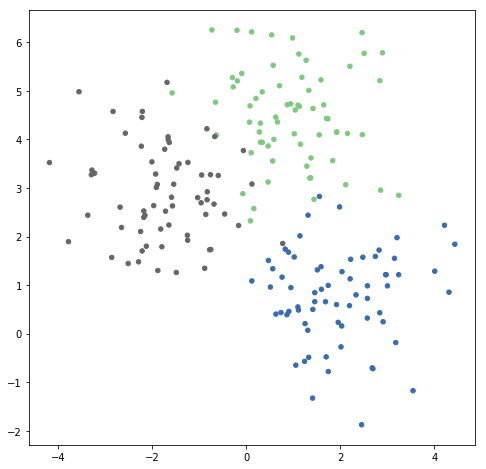

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

%matplotlib inline
plt.rc('figure', figsize=(8.0, 8.0))

data, label = make_blobs(n_samples=200, random_state=0)
#label = label.reshape(200, 1) #TonyH; error

plt.scatter(data[:,0], data[:,1], s=20, c=label, cmap=plt.cm.Accent)

簡單說明本程式的重點：
(1)	使用matplotlib.pyplot進行畫圖，使用plt.rc定義圖片大小。
(2)	利用sklearn.datasets載入資料，本範例使用make_blobs，或用circle， API的使用可以參考，make_blobs和make_circle。
(3)	n_samples 取的點數。
(4)	reshape(200,1) 將200個點的陣列轉成向量，其中label的值為0或是1，在圖形上顯示兩種不同的顏色。
(5)	data 為200x2的矩陣，其中data[: ,0] 表示X座標值，data[: ,1]為Y座標值，Color使用label來區分，s為資料的圖形大小。Cmap則是color map的方式。

## 四、TensorFlow 介紹

先來看一個簡單的範例，假設我們要實作一個如下圖這樣的網路，
其中x1、x2；x3是輸入，而變數是a和b，此變數需要學習，並且在之後變化，
這些變數就是我們一般所說的權重。
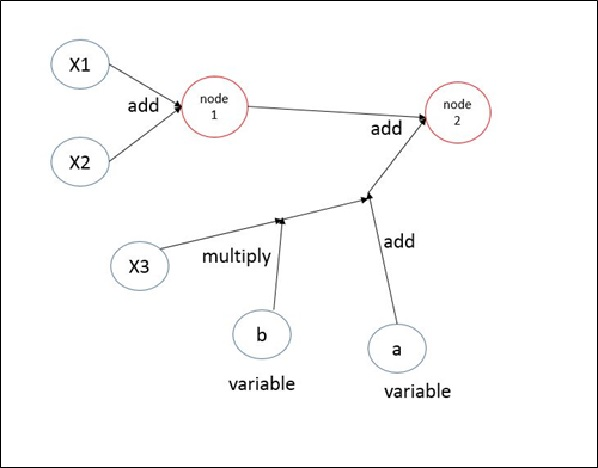

In [12]:
import tensorflow as tf

# (1)
x1 = tf.constant(1.0, tf.float32)
x2 = tf.constant(2.0, tf.float32)
x3 = tf.constant(3.0, tf.float32)

# (2)
node1 = tf.add(x1, x2)

# (3)
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

node2 = a + b * x3 + node1

# (4)
sess = tf.Session()
init = tf.global_variables_initializer() 
sess.run(init)
sess.run(node2, {a: 10.0, b:3.0})

22.0

程式重點： 
(1)	x1、x2、x3 是輸入，我們使用constant使其為定值。
(2)	node1 是 x1和x2的相加。
(3)	a，b是可以調變的變數，注意到這邊，一旦我們定義了變數，我們就必須先初始化變數。
(4)	最後使用session.run執行一輪，即結束。

### 介紹另一個基本的範例 Linear Model

這個範例介紹了如何將一個資料向量X=[x1, x2, x3, x4]，進行向量線性運算 Y = W*X + b，
其中W就是權重。所以如圖十五，經過線性運算後，可以得到一組Y向量。
如果我們希望能夠訓練W的值，我們就需要完成像圖十六這樣的架構。

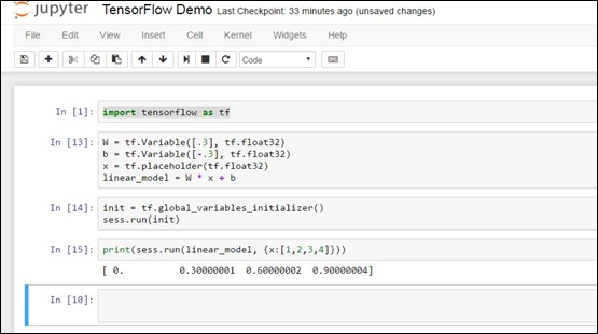

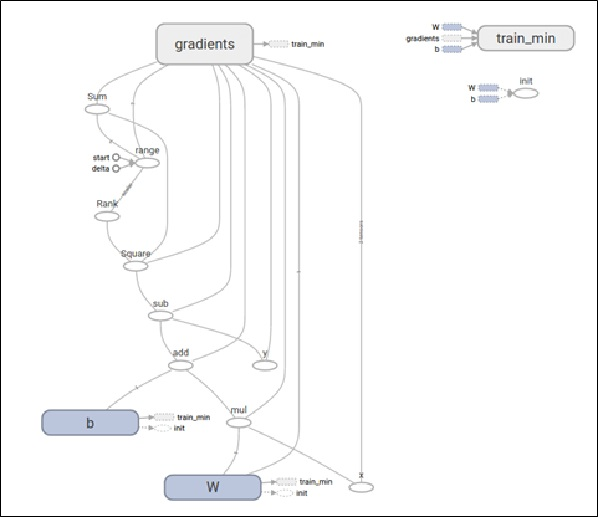

## 五、Keras 介紹

Keras底層也是利用tensorflow來實作，可以把Keras想成更抽像的API
利用Keras的API來建構網路的(文件可參考https://keras.io/layers/core/)

若我們想建立一個輸入為10筆、輸出為2筆的網路架構，程式如下。
其中Model裡的Dense是預設輸入為10，輸出為2的節點。

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(2, input_shape=(10,)))
model.compile(optimizer='sgd', loss='binary_crossentropy') 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 22        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


如果想要在中間多加2層的網路，在不用動到其它程式碼下，只要在中間增加model.add即可，
如下程式碼即建立兩層hidden layer，且各層為10的節點數量：

In [3]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(2, input_shape=(10,)))
model.add(Dense(10))
model.add(Dense(10))
model.compile(optimizer='sgd', loss='binary_crossentropy') 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
